In [13]:
import os
from skimage import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import shutil
import shutil
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def get_size(folder):
    sizes=pd.DataFrame()
    for pic in os.listdir(folder):
        try:
            image=pd.Series(io.imread(folder+pic).shape)
            sizes=sizes.append(image, ignore_index=True)
        except:
            print('Bad file:', pic)
    return sizes

In [3]:
ivy_shape=get_size('plants/Poison_Ivy/')

Text(0.5, 1.0, 'Poison Ivy')

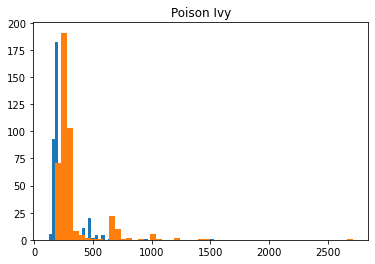

In [4]:
plt.hist(ivy_shape.sort_values(by=0).iloc[:,0], bins=50);
plt.hist(ivy_shape.sort_values(by=1).iloc[:,1], bins=50);
plt.title('Poison Ivy')

In [5]:
oak_shape=get_size('plants/Poison_Oak/')

Bad file: .DS_Store


Text(0.5, 1.0, 'Poison Oak')

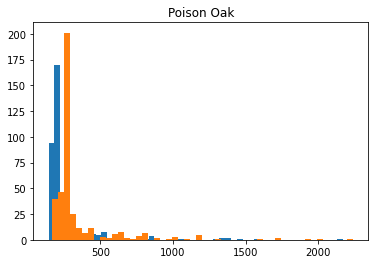

In [6]:
plt.hist(oak_shape.sort_values(by=0).iloc[:,0], bins=50);
plt.hist(oak_shape.sort_values(by=1).iloc[:,1], bins=50);
plt.title('Poison Oak')

In [7]:
benign_shape=get_size('plants/Benign_Plants/')

Text(0.5, 1.0, 'Benign Plants')

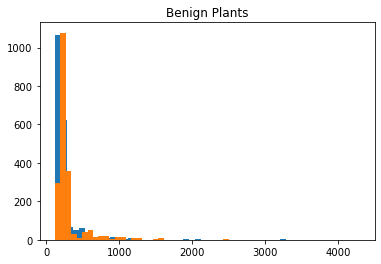

In [8]:
plt.hist(benign_shape.sort_values(by=0).iloc[:,0], bins=50);
plt.hist(benign_shape.sort_values(by=1).iloc[:,1], bins=50);
plt.title('Benign Plants')

In [1]:
ls plants

Benign_Plants/ Poison_Oak/    train/
Poison_Ivy/    test/          val/


In [3]:
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

NameError: name 'Sequential' is not defined

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
mkdir preview

In [8]:
train_datagen=ImageDataGenerator(
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=False)

In [16]:
img = load_img('plants/train/Poison_Ivy/109.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='poison_ivy', save_format='jpeg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely

In [22]:
im_list=os.listdir('preview/')
pic=io.imread('preview/'+im_list[0])
figsize=(10,10)

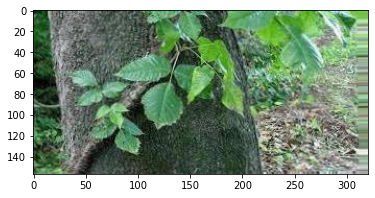

In [24]:
fig, ax=plt.subplots()
ax.imshow(pic)

<ipython-input-32-56d018a24f49>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


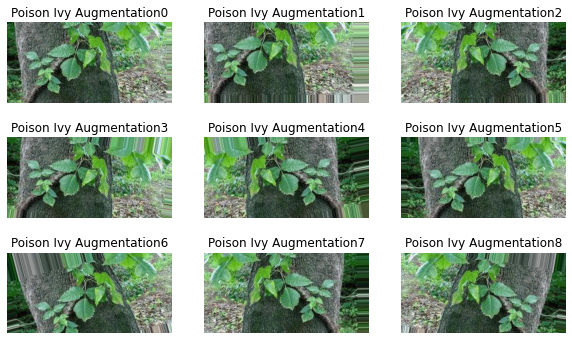

In [32]:
plt.figure(figsize=(10, 6))
for images in im_list[0:10]:   
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(io.imread('preview/'+im_list[i]))
        plt.title('Poison Ivy Augmentation'+ str(i))
        plt.axis("off")
plt.savefig('graphs/augmentation', bbox_inches='tight');